In [4]:
from __future__ import division, print_function

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import os
import json
from pprint import pprint
from results import read_results, flatten_json

In [81]:
# os.chdir('./0project/MScThesis/')
results_path = '../bucket/results/'
results_files = os.path.join(results_path, 'result_*.json')

graphs_path = '../'
os.getcwd()

'/Users/hmourit/Documents/0project/MScThesis'

In [ ]:
results = json.load(open('./results/results.json', 'r'))
results = pd.io.json.json_normalize(results)
results['target'] = results.target.fillna('drug')
results

In [ ]:
temp = results[results['split.test_size'] == 0.1][results['classifier'] == 'EN']
temp = temp[['split.n_iter', 'cross_val.n_folds', 'results.accuracy.mean', 'results.accuracy.std', 'target']]
temp[temp['target'] == 'drug']

In [ ]:
temp = results[results['classifier'] == 'SVC']
temp = temp[['split.test_size', 'split.n_iter', 'cross_val.n_folds', 'results.accuracy.mean', 'results.accuracy.std', 'target']]
temp[temp['target'] == 'drug']

In [ ]:
# keys = ['classifier', 'cross_val.n_folds', 'split.test_size', 'target']
keys = ['classifier', 'target']

In [ ]:
# def combine_means_and_stds(results, keys):
results['n*mu'] = results['split.n_iter'] * results['results.accuracy.mean']
results['ns2m2'] = results['split.n_iter'] * \
    (results['results.accuracy.std']**2 + results['results.accuracy.mean']**2)
aggregated = results.groupby(keys).agg(np.sum)
aggregated['mean'] = aggregated['n*mu'] / aggregated['split.n_iter']
aggregated['variance'] = (aggregated['ns2m2'] - aggregated['mean']**2 * aggregated['split.n_iter']) / aggregated['split.n_iter']
aggregated['std'] = np.sqrt(aggregated['variance'])
aggregated[['split.n_iter', 'mean', 'std']]

In [ ]:
pprint(aggregated[['split.n_iter', 'mean', 'std']].to_json())

In [ ]:
combine_means_and_stds(results, keys)

In [ ]:
aggregated = grouped.agg(np.sum)
aggregated

In [ ]:
aggregated['new_mu'] = aggregated['n*mu'] / aggregated['split.n_iter']
aggregated

In [ ]:
results.join(aggregated['new_mu'], on=['classifier', 'cross_val.n_folds', 'split.test_size', 'target'])

In [ ]:
foo = np.random.normal(0.414286, 0.162255, (10,))
print(foo.mean(), foo.std())
foo2 = (foo - foo.mean()) / foo.std()
print(foo2.mean(), foo2.std())
foo3 = (foo2 * 0.162255) + 0.414286
print(foo3.mean(), foo3.std())

In [ ]:
def fake_scores(n, mu, std):
    fake = np.random.normal(mu, std, (n,))
    fake = (fake - fake.mean()) / fake.std()
    fake = fake * std + mu
    return fake

In [ ]:
# results = json.load(open(os.path.join(results_path, 'results.json'), 'r'))
# for result in results:
#     experiment_id = hash(json.dumps(result))
#     result['experiment_id'] = experiment_id
#     result['data'] = 'mdd_transcriptomics'
#     if 'target' not in result:
#         result['target'] = 'drug'
#     n = result['split']['n_iter']
#     mu = result['results']['accuracy']['mean']
#     std = result['results']['accuracy']['std']
#     result['results']['accuracy']['scores'] = fake_scores(n, mu, std).tolist()
#     with open(os.path.join(results_path, 'result_{}.json'.format(experiment_id)), 'w') as out:
#         json.dump(result, out, sort_keys=True, indent=2, separators=(',', ': '))

In [ ]:
# file_ = os.path.join(results_path, 'results_new.json')
# experiments = {}
# results = json.load(open(file_, 'r'))
# for result in results:
#     if result['experiment_id'] not in experiments:
#         experiments[result['experiment_id']] = result
#         result['results'] = {'accuracy': {'scores': []}}
#     experiments[result['experiment_id']]['resultbs']['accuracy']['scores'].append(result['accuracy'])

# for experiment in experiments.values():
#     experiment['results']['accuracy']['mean'] = np.mean(experiment['results']['accuracy']['scores'])
#     experiment['results']['accuracy']['std'] = np.std(experiment['results']['accuracy']['scores'])
#     del experiment['accuracy']
#     if 'data' not in experiment:
#         experiment['data'] = 'mdd_transcriptomics'
#     with open(os.path.join(results_path, 'result_{}.json'.format(experiment['experiment_id'])), 'w') as out:
#         json.dump(experiment, out, sort_keys=True, indent=2, separators=(',', ': '))

In [91]:
results = read_results(results_files, record_path='results.accuracy.scores')
results.describe()

,cross_val.n_folds,experiment_id,pca.n_components,results.accuracy.mean,results.accuracy.scores,results.accuracy.std,split.n_iter,split.test_size
count,20954.000000,2.095400e+04,20674.000000,20954.000000,20954.000000,20954.000000,20954.000000,20954.000000
mean,10.013935,-2.838904e+16,47.599158,0.701694,0.701694,0.104120,65.457860,0.100573
std,0.382149,5.281971e+18,29.440765,0.157107,0.189080,0.015075,34.373837,0.010687
min,2.000000,-9.202101e+18,1.000000,0.160000,0.000000,0.000000,1.000000,0.100000
25%,10.000000,-4.543301e+18,21.000000,0.654667,0.600000,0.095868,30.000000,0.100000
50%,10.000000,-5.733622e+17,46.000000,0.780741,0.733333,0.103064,45.000000,0.100000
75%,10.000000,4.621975e+18,73.000000,0.793333,0.866667,0.114026,100.000000,0.100000
max,20.000000,9.216049e+18,100.000000,0.913333,1.062965,0.183908,100.000000,0.300000


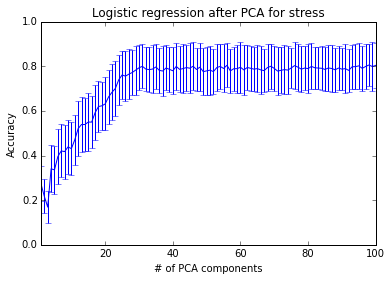

In [94]:
group_keys = ['classifier', 'target', 'pca.n_components']
results['classifier'] = results['classifier'].replace('SVC', 'svm')
summary = results.groupby(group_keys).agg({'results.accuracy.scores': [len, np.mean, np.std]})
summary = summary.loc[('logit', 'stress'), ('results.accuracy.scores')]
summary['mean'].plot(yerr=summary['std'])
plt.title('Logistic regression after PCA for stress')
plt.xlabel('# of PCA components')
plt.ylabel('Accuracy')
plt.savefig(os.path.join(graphs_path, 'accu_vs_pca_components.eps'))